In [1]:
# %matplotlib notebook

In [27]:
import sys
sys.path.append('/Users/jakob/Documents/RU/Code/segment')
import watershed3d
from imutils import random_cmap
from skimage.morphology import watershed
import matplotlib as mpl
from skimage.measure import regionprops
import pandas as pd
import tifffile as tiff
from matplotlib.pylab import imshow, plot, subplots, hist, scatter, bar, step
# import imutils

load file 

In [3]:
filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c1.tif'
# filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c1.tif'
# filename = '/Users/jakob/Documents/RU/Data/mouse_example/C1-Brachy_568_FoxA2_488_Cdx2_647_500um_2_filtered.tif'
w = watershed3d.Ws3d(filename)

check histogram of image data

In [4]:
# w.intensity_histogram()

load Ilastik probability mask and plot it

In [5]:
w.load_mask(prob=0.5)
# w.plot_probability_map(21)

shape (16, 964, 963) (16, 964, 963)
loaded probability map
loaded object prediction


do segmentation without the object classifier

In [6]:
w.segment(do_not_use_object_classifier=1, sigma=(2,6,6))

(16, 964, 963)
len rp= 682
segmentation done, found 685 cells


show segmentation

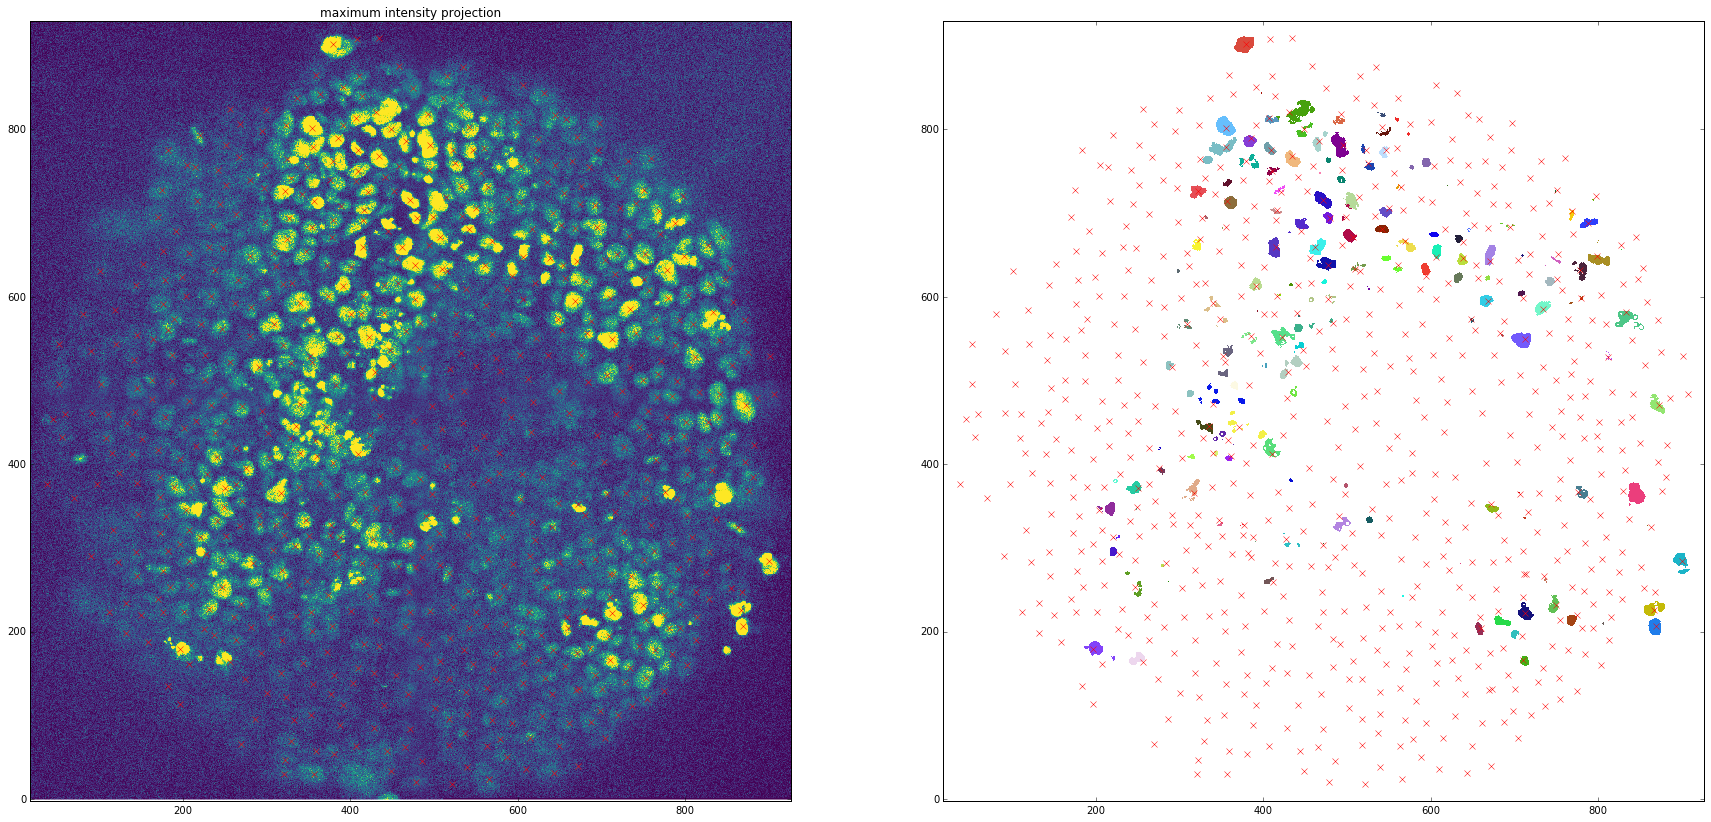

In [7]:
w.show_segmentation(z=3,figsize=(30,20))

In [8]:
w.df.head()

,area,total_intensity,mean_intensity,centroid
cell_id,,,,
1,3393,21446896.0,6320.924256,"[5.93427645152, 206.16357206, 869.867374005]"
2,2614,7400946.0,2831.272379,"[4.86534047437, 227.377964805, 867.933052793]"
3,2732,6012233.0,2200.670937,"[5.75988286969, 659.951317716, 415.837115666]"
4,1212,2988381.0,2465.660891,"[5.07425742574, 776.394389439, 409.015676568]"
5,2759,5411742.0,1961.486771,"[5.36897426604, 222.393983327, 712.870242842]"


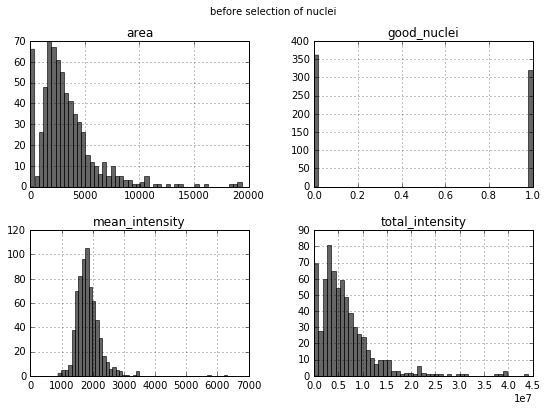

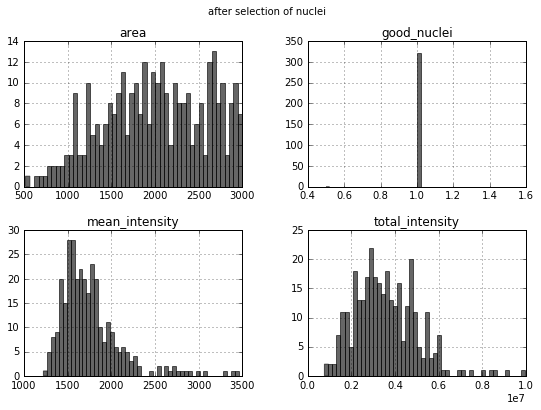

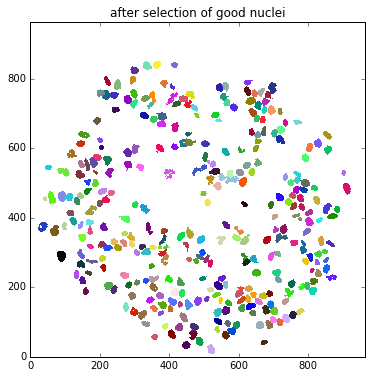

In [9]:
w.select_nuclei(quantiles=[0.2,0.8], cutoff=[500,3000], plot=1)

apply to other channels

In [10]:
# filename_bra = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c2.tif'
# filename_sox17 = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c3.tif'
# filename_sox2 = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c4.tif'
filename_bra = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c2.tif'
filename_sox17 = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c3.tif'
filename_sox2 = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c4.tif'

/Users/jakob/Documents/RU/Code/watershed3d/watershed3d.py:549: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return im - np.partition(imm[imm.nonzero()], n)[:n].mean()


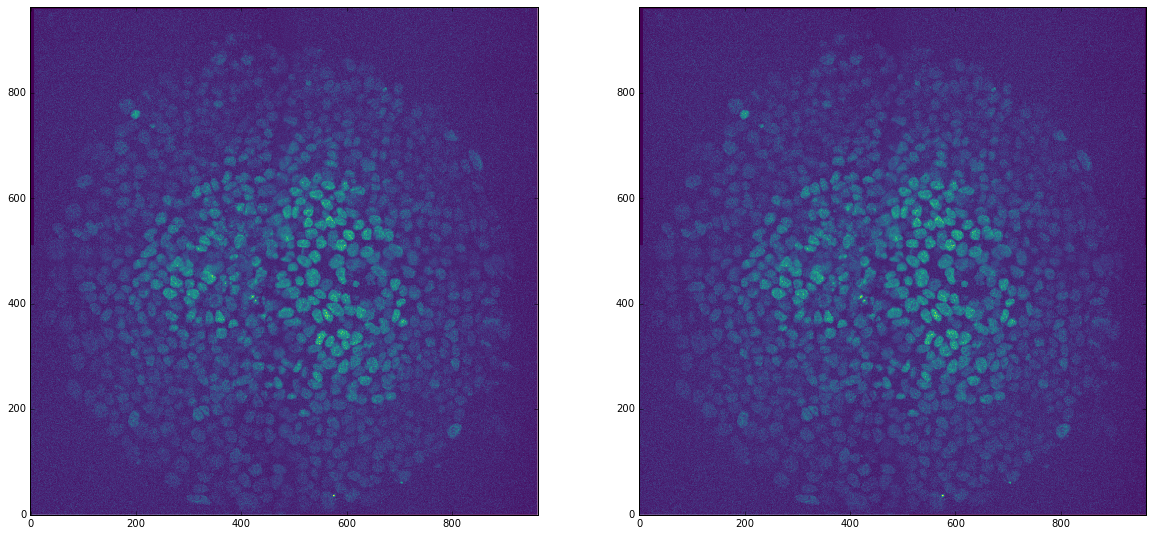

In [11]:
s2=tiff.imread(filename_sox2)
_,ax=subplots(1,2, figsize=(20,10))
ax[0].imshow(s2[9], cmap='viridis', origin='lower')
ax[1].imshow(w.remove_background(s2,2e5)[9], cmap='viridis', origin='lower')

In [12]:
w.apply_to_channels(filename_sox2, 'sox2')
w.apply_to_channels(filename_bra, 'bra')

len rp= 682
len rp= 682


In [13]:
# w.df.drop('good_nuclei', axis=1, inplace=1)

In [14]:
w.df.head()
# w.good_nuclei.head()

,area,total_intensity,mean_intensity,centroid,good_nuclei,sox2,bra
cell_id,,,,,,,
1,3393,21446896.0,6320.924256,"[5.93427645152, 206.16357206, 869.867374005]",False,518411.2965,85896.339
2,2614,7400946.0,2831.272379,"[4.86534047437, 227.377964805, 867.933052793]",True,358176.1070,59038.522
3,2732,6012233.0,2200.670937,"[5.75988286969, 659.951317716, 415.837115666]",True,877855.7660,51820.036
4,1212,2988381.0,2465.660891,"[5.07425742574, 776.394389439, 409.015676568]",True,202953.0060,21605.076
5,2759,5411742.0,1961.486771,"[5.36897426604, 222.393983327, 712.870242842]",True,668482.1795,78613.357


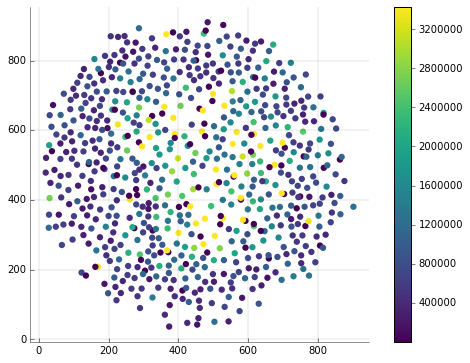

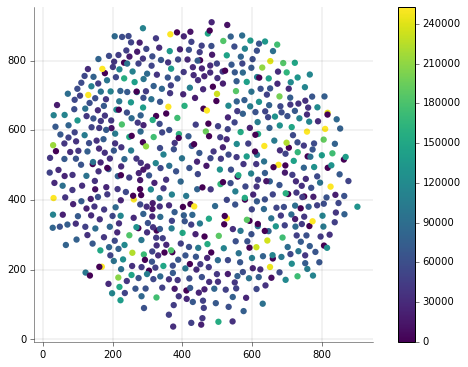

In [15]:
w.dot_plot('sox2', colormap_cutoff=0.3)
w.dot_plot('bra', colormap_cutoff=0.6)

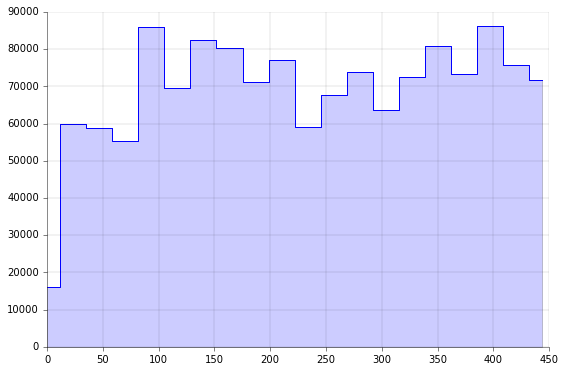

In [93]:
xn,n = w.radial_profile_per_cell('bra',20)
_,ax = subplots()
ax.step(xn[:-1]-xn[0],n, where='mid')
ax.fill_between(xn[:-1]-xn[0], n, alpha=0.2, step='mid')
# ax.set_xlim([0, ax.get_xlim()[1]])
watershed3d.nice_spines(ax)

In [44]:
rlist = []
for i1 in ce.index:
    rlist.append( np.sqrt((ce[i1][1]-w.center[1])**2 + (ce[i1][1]-w.center[1])**2) ) 
rlist = np.array(rlist)

NameError: name 'ce' is not defined

In [ ]:
hist(rlist,10, weights=ti)

In [ ]:
w.channels['sox2'][w.good_nuclei].total_intensity.hist(bins=100)

In [ ]:
w.channels['bra'][w.good_nuclei].total_intensity.hist(bins=100)

In [ ]:
r,rs = w.radial_intensity('bra', use_selected_nuclei=1)
fig,ax=subplots()
ax.plot(r,pd.DataFrame(rs).rolling(5).mean())
ax.set_xlim([0,450])
ax.set_xlabel('r', fontsize=16)
ax.set_ylabel('Bra intensity', fontsize=16)
watershed3d.nice_spines(ax)

In [ ]:
r,rs = w.radial_intensity('sox2', use_selected_nuclei=1)
fig,ax=subplots()
ax.plot(r,rs)
ax.set_xlim([0,450])
ax.set_xlabel('r', fontsize=16)
ax.set_ylabel('Sox2 intensity', fontsize=16)
watershed3d.nice_spines(ax)

In [ ]:
print(w.df.shape, w.good_nuclei.shape, w.channels['sox2'].shape)
print(w._regionprops_to_dataframe(w.ws,w.image_stack).shape)

In [ ]:
w.channels['bra'].columns = ['area', 'bra', 'mean_intensity', 'centroid']

In [ ]:
w.channels['bra'].columns

In [ ]:
pd.concat([w.df, w.channels['bra']['bra']], axis=1)
# w.channels['bra'].total_intensity

In [ ]:
print(type(w.df))
print(type(w.channels['sox2']))
s2=tiff.imread(filename_sox2)
print(w._regionprops_to_dataframe(w.ws,w.image_stack).shape,w._regionprops_to_dataframe(w.ws,s2).shape,w.good_nuclei.shape)

In [ ]:
w.channels['sox2'][w.good_nuclei].hist()

In [ ]:
from scipy.ndimage.measurements import center_of_mass
from matplotlib.pylab import imshow, plot, subplots

c=center_of_mass(w.image_stack)
fig,ax=subplots()
ax.imshow(w.image_stack.max(axis=0), origin='lower')
ax.plot(c[2],c[1],'or',ms=4)
# fig.tight_layout()
# ax.axis('equal')
# ax.axis('tight')
ax.autoscale(tight=1)

In [ ]:
# print(w.image_stack.shape[1:]-w.center[1:])
w.image_stack.shape[1:]
type(w.center)

In [ ]:
sox2=tiff.imread(filename_sox2)

In [ ]:
a1=sox2[10]
a1.shape
a2=np.tile(a1, (10,1,1))
(a2[4]!=a1).sum()

In [ ]:
rprofile = w._radial_profile(sox2, w.ws.astype(np.bool), plot=1)

In [ ]:
plot(np.arange(rprofile.shape[0]*w.xy_scale),rprofile)

In [ ]:
from scipy.ndimage.measurements import center_of_mass
aaa=np.array([[0,0],[1,0]])
imshow(aaa, origin='lower')
center_of_mass(aaa)

In [ ]:
# plot(w.radial_profile(w.image_stack.mean(axis=0), w.center[1:]))
sox2=tiff.imread(filename_sox2)
_, ax=subplots()
r, rprofile = w._radial_profile(sox2.mean(axis=0), w.center[1:])
ax.plot(rprofile)
watershed3d.nice_spines(ax)
ax.set_title('Sox2')
ax.set_xlabel('radial distance')
ax.set_ylabel('intensity')